In [1]:
import sklearn
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
feature_text='label, lepton pT, lepton eta, lepton phi, lost energy mag, lost energy phi, jet 1 pt, jet 1 eta, jet 1 phi, jet 1 b-tag, jet 2 pt, jet 2 eta, jet 2 phi, jet 2 b-tag, jet 3 pt, jet 3 eta, jet 3 phi, jet 3 b-tag, jet 4 pt, jet 4 eta, jet 4 phi, jet 4 b-tag, m_jj, m_jjj, m_lv, m_jlv, m_bb, m_wbb, m_wwbb'
features=[a.strip() for a in feature_text.split(',')]

dataset = pd.read_csv('newhiggs.csv', names=features)

In [3]:
from sklearn.model_selection import train_test_split
f = features[1:]
x_train, x_test, y_train, y_test = train_test_split(dataset[f], dataset['label'], stratify=dataset['label'])

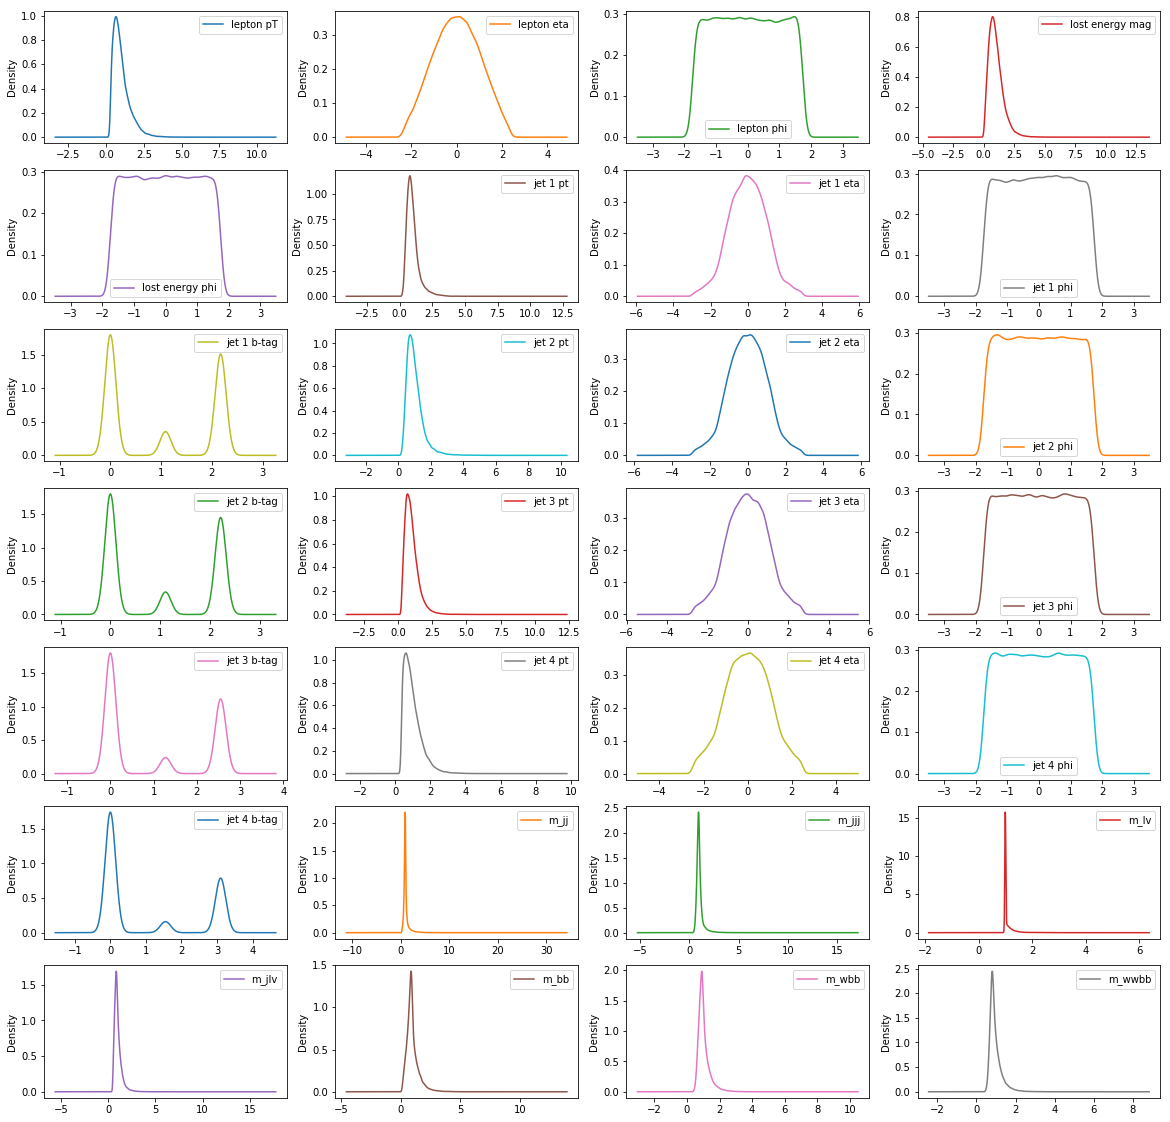

In [4]:
x_train.plot(kind='density', subplots=True, layout=(7,4), figsize = (20,20), sharex=False)
plt.show()

In [5]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import Normalizer 

from sklearn.metrics import f1_score ,average_precision_score ,roc_auc_score


logreg1 = LogisticRegression()
logreg1.fit(x_train,y_train)
logreg1.score(x_test,y_test)

0.63512

In [6]:
print("Test Avg Precision score: ", average_precision_score(logreg1.predict(x_test),y_test))
print("Test F1 score: ", f1_score(logreg1.predict(x_test),y_test))
print("Test ROC AUC score: ", roc_auc_score(logreg1.predict(x_test),y_test))

Test Avg Precision score:  0.694652968499841
Test F1 score:  0.6824479565550373
Test ROC AUC score:  0.6354216984483583


In [7]:
logreg1.coef_[0]

array([-3.30548372e-01, -6.86334393e-03,  4.30076715e-03, -4.08294179e-01,
       -4.38220447e-04,  8.21546165e-01,  7.63228613e-03,  1.71840673e-03,
        5.97978646e-02,  2.00605660e-01,  2.57431573e-03,  6.99130570e-03,
       -5.12317772e-02,  1.24680831e-01,  9.75680513e-03,  1.45668227e-02,
       -5.84325475e-02,  1.88661142e-01, -1.08009309e-02,  9.85083501e-03,
       -4.99777040e-02, -1.71785046e-01,  6.99283130e-01,  7.09494185e-01,
        5.07065577e-01, -1.19979840e+00,  1.76443113e+00, -3.14906541e+00])

In [8]:
colour = []
for i in range(14):
    if i < 7:
        colour.append("red")
    else:
        colour.append("blue")

def plot(coef,feature_names,i): 
    top20_index_pos = coef.argsort()[-7:] 
    top20_pos = coef[top20_index_pos]
    print (top20_pos)
    top20_names_pos = [feature_names[j] for j in top20_index_pos] 
    print(top20_names_pos)
    top20_index_neg = coef.argsort()[:7] 
    top20_neg = coef[top20_index_neg]
    print (top20_neg)
    top20_names_neg = [feature_names[j] for j in top20_index_neg] 
    print(top20_names_neg)
    top_coef = np.hstack([top20_neg,top20_pos])
    print(top_coef)
    top_names = np.hstack([top20_names_neg,top20_names_pos])
    print(top_names)
    plt.figure(figsize=(10,4))
    plt.bar(range(1,15),top_coef,color=colour)
    plt.title('most important features '+str(i))
    plt.xticks(range(1,15),top_names,rotation=45)
    plt.show()

[0.09534054 0.09987296 0.117359   0.20335491 0.26783122 0.39070945
 0.65033475]
['jet 4 pt', 'jet 2 pt', 'm_lv', 'm_jlv', 'm_jjj', 'jet 1 pt', 'm_wbb']
[-0.99159178 -0.62525972 -0.24324299 -0.18743234 -0.11715313 -0.06997948
 -0.06973781]
['m_wwbb', 'm_bb', 'lost energy mag', 'lepton pT', 'm_jj', 'jet 4 b-tag', 'jet 3 b-tag']
[-0.99159178 -0.62525972 -0.24324299 -0.18743234 -0.11715313 -0.06997948
 -0.06973781  0.09534054  0.09987296  0.117359    0.20335491  0.26783122
  0.39070945  0.65033475]
['m_wwbb' 'm_bb' 'lost energy mag' 'lepton pT' 'm_jj' 'jet 4 b-tag'
 'jet 3 b-tag' 'jet 4 pt' 'jet 2 pt' 'm_lv' 'm_jlv' 'm_jjj' 'jet 1 pt'
 'm_wbb']


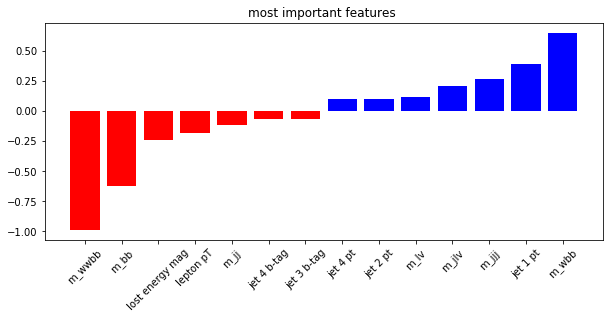

In [67]:
plot(logreg1.coef_[0], f, 1)

In [10]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

In [11]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

In [12]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=20),
    RandomForestClassifier(max_depth=20, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

In [13]:
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [14]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [15]:
logreg1 = LogisticRegression()
logreg1.fit(x_train,y_train)
logreg1.score(x_test,y_test)

0.6352

In [16]:
print("Test Avg Precision score: ", average_precision_score(logreg1.predict(x_test),y_test))
print("Test F1 score: ", f1_score(logreg1.predict(x_test),y_test))
print("Test ROC AUC score: ", roc_auc_score(logreg1.predict(x_test),y_test))

Test Avg Precision score:  0.6944836592046235
Test F1 score:  0.6824512534818942
Test ROC AUC score:  0.6354895204843213


In [17]:
all_clf = []
for clf, n in zip(classifiers, names):
    clf.fit(x_train, y_train)
    k = clf.score(x_test, y_test)
    print(n, ': ', k)
    all_clf.append(clf)

Nearest Neighbors :  0.60948
Linear SVM :  0.63768
RBF SVM :  0.53096


MemoryError: 

In [19]:
new = ["Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]
c = [    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

In [20]:
new_clf = []
for clf, n in zip(c, new):
    clf.fit(x_train, y_train)
    k = clf.score(x_test, y_test)
    print(n, ': ', k)
    all_clf.append(clf)

Neural Net :  0.69008
AdaBoost :  0.68852
Naive Bayes :  0.60264
QDA :  0.64424


array([[ 5.21606620e-02,  3.59450446e-03,  4.78729662e-04,
         9.96650703e-02,  1.21947248e-03, -6.77959268e-02,
        -1.20983139e-03,  3.36379100e-03, -5.30275095e-05,
        -2.55101383e-02, -1.47993760e-03, -2.29099807e-03,
         5.60563930e-02, -1.10747139e-02, -2.80308329e-03,
        -5.98082007e-03,  2.99577960e-02, -3.81950709e-02,
         4.96712885e-03, -5.71629370e-03, -1.64097721e-02,
        -1.33738127e-02, -2.65218925e-02, -1.44344037e-02,
         2.76315986e-02,  1.60346662e-01,  6.47360710e-02,
         1.26819145e-01],
       [-4.61172270e-02, -3.17803824e-03, -4.23263119e-04,
        -8.81176829e-02, -1.07818205e-03,  5.99409598e-02,
         1.06965799e-03, -2.97405568e-03,  4.68836399e-05,
         2.25544845e-02,  1.30846917e-03,  2.02555861e-03,
        -4.95615911e-02,  9.79157620e-03,  2.47831265e-03,
         5.28787071e-03, -2.64868279e-02,  3.37697162e-02,
        -4.39162771e-03,  5.05399288e-03,  1.45085043e-02,
         1.18242970e-02,  2.34

In [62]:
dict1 = {'RBF SVM':0.53096,'Naive Bayes': 0.60264,'k Nearest Neighbours': 0.60948, 'Logistic Regression':0.63512, 'Linear SVM': 0.63768,'Decision Tree': 0.6801,'Multi Layer Perceptron': 0.69008,
       'Random Forest': 0.6925, 'Gradient Boosting': 0.7 
       }

Text(0.5,1,'Accuracy')

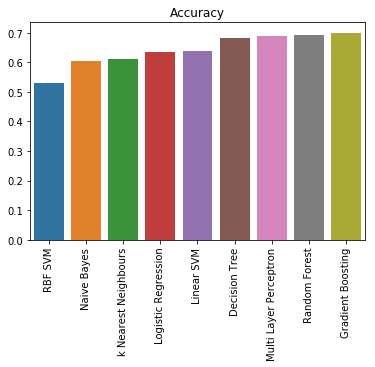

In [63]:
g = sns.barplot(list(dict1.keys()), list(dict1.values()))
#g.set_xticklabels(rotation=30)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title('Accuracy')